<div class="jumbotron">
  <h1><i class="fa fa-bar-chart" aria-hidden="true"></i> Limpieza de datos</h1>
  <p></p>
</div>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from mlxtend.preprocessing import standardize
from scipy import stats

# Declaración de variables

In [2]:
organismo ="Meloidogyne"
dataset = 1
nombre = ("ds" + str(dataset) + "_" + str(organismo))
nombre2 = (str(organismo)+ " dataset " + str(dataset))
r2 = ("Datos/resultados/"+ str(organismo) + "/" + str(nombre) + "/transformaciones/sin_filtrar")
r3 = ("Datos/resultados/"+ str(organismo) + "/" + str(nombre) + "/transformaciones/sin_atipicos")

nom1 = ("/ds" + str(dataset) + "_AAC_efectores_" + str(organismo) + ".txt")
nom2 = ("/ds" + str(dataset) + "_ACC_hidro_mass_efectores_" + str(organismo) + ".txt")
nom3 = ("/ds" + str(dataset) + "_ACC_mass_efectores_" + str(organismo) + ".txt")
nom4 = ("/ds" + str(dataset) + "_ACC_hidro_efectores_" + str(organismo) + ".txt")
nom5 = ("/ds" + str(dataset) + "_PseAAC_hidro_mass_efectores_" + str(organismo) + ".txt")
nom6 = ("/ds" + str(dataset) + "_PseAAC_mass_efectores_" + str(organismo) + ".txt")
nom7 = ("/ds" + str(dataset) + "_PseAAC_hidro_efectores_" + str(organismo) + ".txt")

nom8 = ("/ds" + str(dataset) + "_AAC_no_efectores_" + str(organismo) + ".txt")
nom9 = ("/ds" + str(dataset) + "_ACC_hidro_mass_no_efectores_" + str(organismo) + ".txt")
nom10 = ("/ds" + str(dataset) + "_ACC_mass_no_efectores_" + str(organismo) + ".txt")
nom11 = ("/ds" + str(dataset) + "_ACC_hidro_no_efectores_" + str(organismo) + ".txt")
nom12 = ("/ds" + str(dataset) + "_PseAAC_hidro_mass_no_efectores_" + str(organismo) + ".txt")
nom13 = ("/ds" + str(dataset) + "_PseAAC_mass_no_efectores_" + str(organismo) + ".txt")
nom14 = ("/ds" + str(dataset) + "_PseAAC_hidro_no_efectores_" + str(organismo) + ".txt")

#Efectores
AAC_efec= pd.read_csv(str(r2) + str(nom1), header=None,prefix='X',sep=',')
ACC_hidro_mass_efec = pd.read_csv(str(r2) + str(nom2), header=None,prefix='X',sep=',')
ACC_mass_efec = pd.read_csv(str(r2) + str(nom3), header=None,prefix='X',sep=',')
ACC_hidro_efec = pd.read_csv(str(r2) + str(nom4), header=None,prefix='X',sep=',')
PseAAC_hidro_mass_efec = pd.read_csv(str(r2) +str(nom5), header=None,prefix='X',sep=',')
PseAAC_mass_efec = pd.read_csv(str(r2) + str(nom6), header=None,prefix='X',sep=',')
PseAAC_hidro_efec = pd.read_csv(str(r2) + str(nom7), header=None,prefix='X',sep=',')

#No efectores
AAC_no_efec= pd.read_csv(str(r2) + str(nom8), header=None,prefix='X',sep=',')
ACC_hidro_mass_no_efec =pd.read_csv(str(r2) + str(nom9), header=None,prefix='X',sep=',')
ACC_mass_no_efec =pd.read_csv(str(r2) + str(nom10), header=None,prefix='X',sep=',')
ACC_hidro_no_efec =pd.read_csv(str(r2) + str(nom11), header=None,prefix='X',sep=',')
PseAAC_hidro_mass_no_efec =pd.read_csv(str(r2) + str(nom12), header=None,prefix='X',sep=',')
PseAAC_mass_no_efec =pd.read_csv(str(r2) + str(nom13), header=None,prefix='X',sep=',')
PseAAC_hidro_no_efec =pd.read_csv(str(r2) + str(nom14), header=None,prefix='X',sep=',')

# Composición de aminoácidos (AAC)

efectores
Composición de aminoácidos (AAC) efectores Meloidogyne dataset 1, con valores atípicos.
Valores del documento csv.

        X0      X1      X2     X3     X4      X5     X6      X7     X8  \
0    7.083   2.083   5.417  6.250  0.833  10.833  0.833   3.333  1.667   
1    2.214   7.011   7.011  5.904  3.321   9.963  3.321   8.487  2.583   
2    3.846   4.327   9.615  9.135  5.288   2.885  4.808  11.538  3.365   
3    4.762   0.595   7.738  5.952  2.976   4.167  4.167   7.143  1.786   
4    3.185   1.911   3.822  1.911  3.185   3.185  7.643   2.548  1.274   
..     ...     ...     ...    ...    ...     ...    ...     ...    ...   
95   4.188   3.665  10.471  9.948  2.094   3.141  4.712   1.571  0.524   
96   4.152   1.730   6.574  2.768  3.114   3.114  2.768   6.228  2.422   
97   8.054   2.685   6.040  6.040  2.013   2.013  1.342   9.396  0.671   
98  12.800  13.600   4.000  4.000  0.000   2.400  1.600  12.000  0.800   
99   7.429   1.714   7.429  1.714  2.857   7.429  3.429   8.

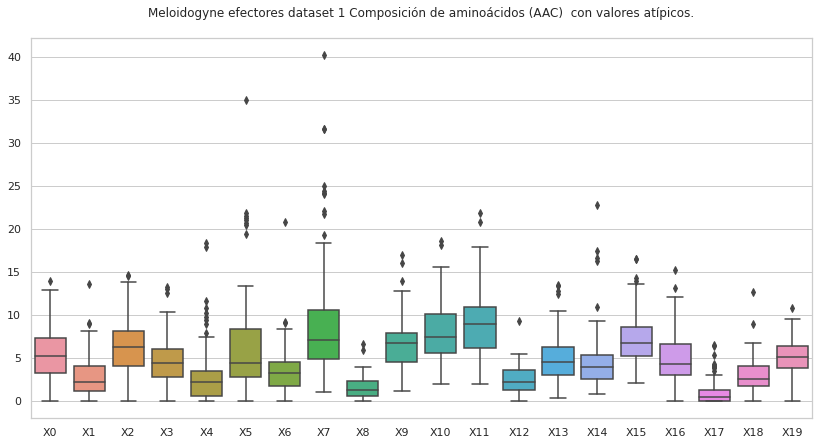

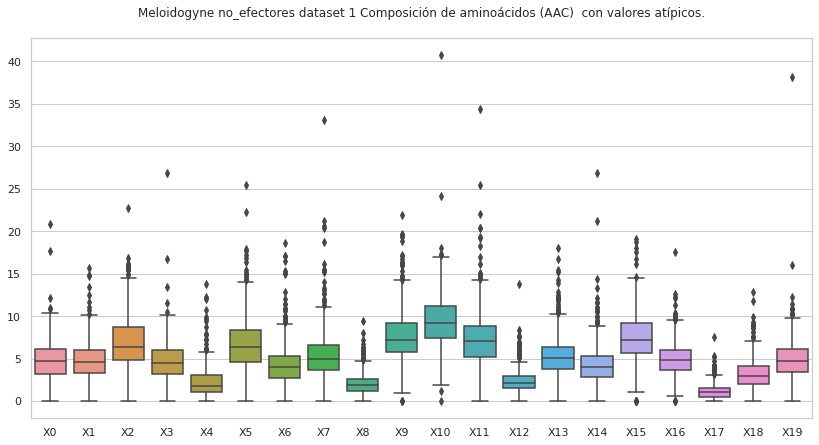

In [3]:
transf = "Composición de aminoácidos (AAC) "
etiq="efectores "
estado = "con valores atípicos.\n"
df=""

for etiq in "efectores", "no_efectores":    
    titulo = (str(transf) + str(etiq) + " " + str(nombre2) + ", " +str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=AAC_efec
        
    if etiq == "no_efectores":
        df=AAC_no_efec    
    
    #del df['X20']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq) +" dataset "+ str(dataset)+" "+str(transf)+" "+str(estado))

## Composición de aminoácidos (AAC), sin valores atípicos

efectores
Composición de aminoácidos (AAC) efectores Meloidogyne dataset 1, sin valores atípicos.
Valores del documento csv.

       X0     X1      X2     X3     X4      X5     X6      X7     X8      X9  \
0   7.083  2.083   5.417  6.250  0.833  10.833  0.833   3.333  1.667   5.000   
1   2.214  7.011   7.011  5.904  3.321   9.963  3.321   8.487  2.583   7.380   
2   3.846  4.327   9.615  9.135  5.288   2.885  4.808  11.538  3.365   6.250   
3   4.762  0.595   7.738  5.952  2.976   4.167  4.167   7.143  1.786   6.548   
4   3.185  1.911   3.822  1.911  3.185   3.185  7.643   2.548  1.274  12.739   
..    ...    ...     ...    ...    ...     ...    ...     ...    ...     ...   
92  5.357  3.214   7.143  5.000  3.571   2.857  1.786   8.571  1.786   6.786   
94  1.899  2.532  14.557  3.797  3.797  11.392  2.532   3.165  0.633   7.595   
95  4.188  3.665  10.471  9.948  2.094   3.141  4.712   1.571  0.524   8.377   
97  8.054  2.685   6.040  6.040  2.013   2.013  1.342   9.396  0.671   6.0

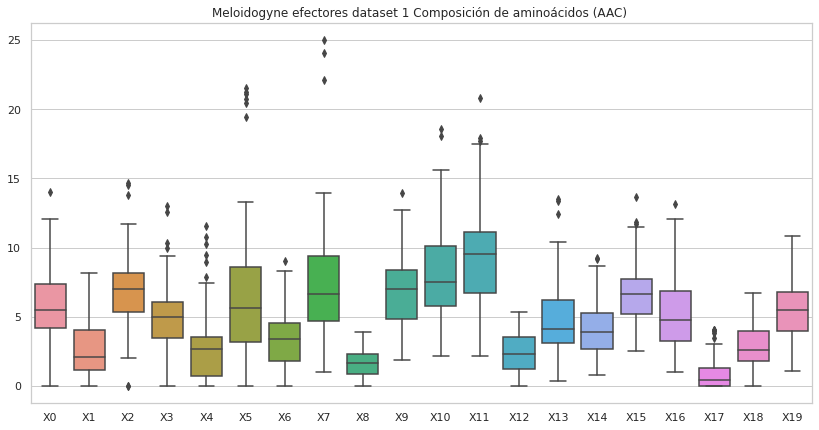

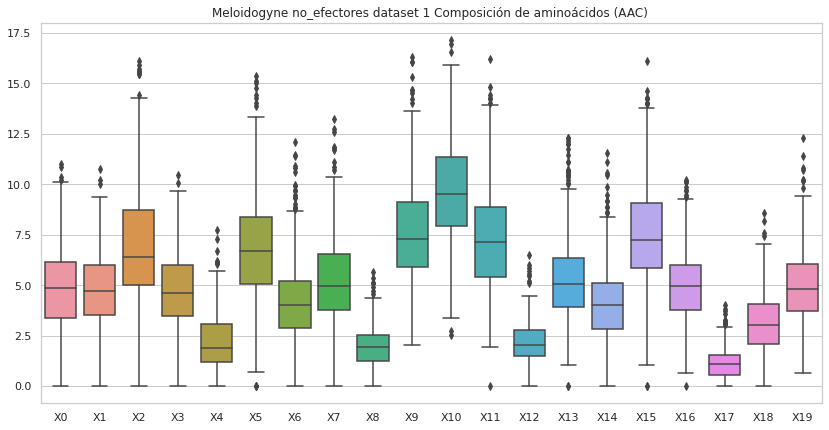

In [4]:
transf = "Composición de aminoácidos (AAC) "
estado = "sin valores atípicos.\n"
transf2="AAC"

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df=""
df_out = pd.DataFrame()


for etiq in "efectores", "no_efectores":    
    titulo = (str(transf) + str(etiq) + " " + str(nombre2) + ", " +str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=AAC_efec
        
    if etiq == "no_efectores":
        df=AAC_no_efec   
    
    del df['X20']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])

    df['X20'] = etiq    
    df_out = pd.concat([df_out,df])
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)
    
    
    
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq) +" dataset "+ str(dataset)+" "+str(transf))

# Composición de pseudo aminoácidos (PseAAC) hidro_mass

efectores
Composición de pseudo aminoácidos (PseAAC)  hidro_mass efectores Meloidogyne dataset 1, con valores atípicos.
Valores del documento csv.

          X0        X1        X2        X3        X4        X5        X6  \
0   0.018089  0.002128  0.015961  0.027665  0.007448  0.008512  0.004256   
1   0.007533  0.011300  0.020088  0.033899  0.018833  0.028877  0.008789   
2   0.018464  0.025389  0.043853  0.013848  0.030005  0.055393  0.016156   
3   0.021094  0.013184  0.026367  0.018457  0.013184  0.031640  0.007910   
4   0.011986  0.011986  0.007191  0.011986  0.038354  0.009588  0.004794   
..       ...       ...       ...       ...       ...       ...       ...   
95  0.028301  0.014151  0.067215  0.021226  0.021226  0.010613  0.003538   
96  0.015365  0.011524  0.010243  0.011524  0.006402  0.023047  0.008963   
97  0.026163  0.006541  0.019622  0.006541  0.013082  0.030524  0.002180   
98  0.036651  0.000000  0.011454  0.006872  0.011454  0.034361  0.002291   
99  0.027096  0.

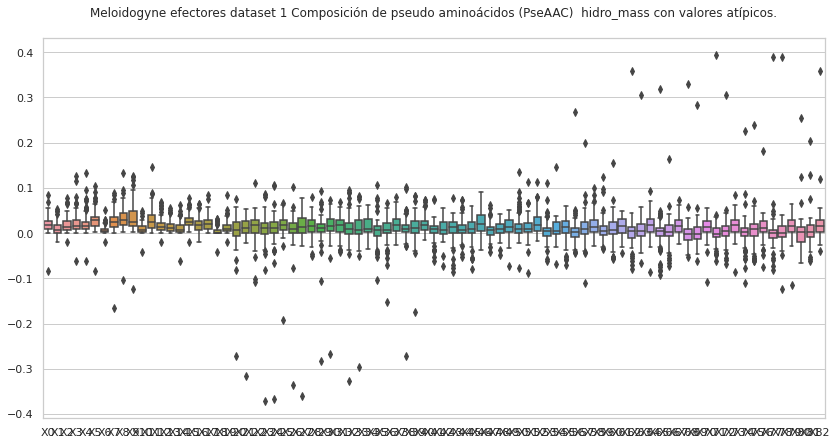

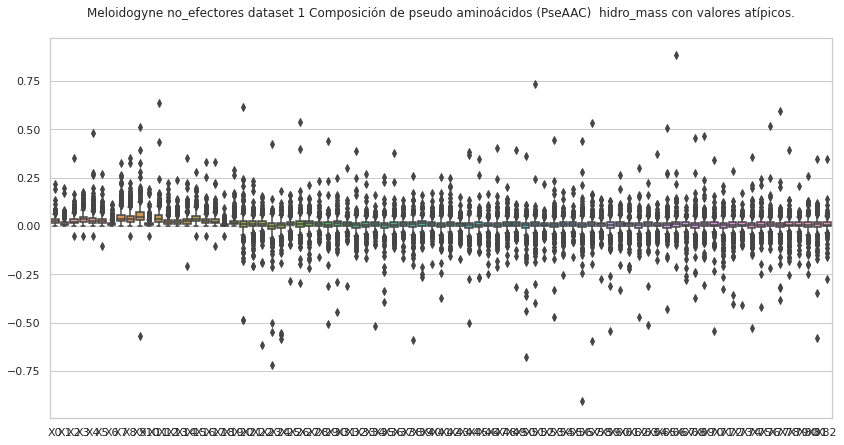

In [5]:
#hidro_mass
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "con valores atípicos.\n"
comp = "hidro_mass"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=PseAAC_hidro_mass_efec

    if etiq == "no_efectores":
        df=PseAAC_hidro_mass_no_efec

    #del df['X83']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Composición de pseudo aminoácidos (PseAAC) hidro_mass, sin valores atípicos

efectores
Composición de pseudo aminoácidos (PseAAC)  hidro_mass efectores Meloidogyne dataset 1, sin valores atípicos.
Valores del documento csv.

          X0        X1        X2        X3        X4        X5        X6  \
0   0.018089  0.002128  0.015961  0.027665  0.007448  0.008512  0.004256   
1   0.007533  0.011300  0.020088  0.033899  0.018833  0.028877  0.008789   
2   0.018464  0.025389  0.043853  0.013848  0.030005  0.055393  0.016156   
3   0.021094  0.013184  0.026367  0.018457  0.013184  0.031640  0.007910   
4   0.011986  0.011986  0.007191  0.011986  0.038354  0.009588  0.004794   
..       ...       ...       ...       ...       ...       ...       ...   
93  0.008825  0.002942  0.008825  0.005884  0.017651  0.032359  0.017651   
95  0.028301  0.014151  0.067215  0.021226  0.021226  0.010613  0.003538   
97  0.026163  0.006541  0.019622  0.006541  0.013082  0.030524  0.002180   
98  0.036651  0.000000  0.011454  0.006872  0.011454  0.034361  0.002291   
99  0.027096  0.

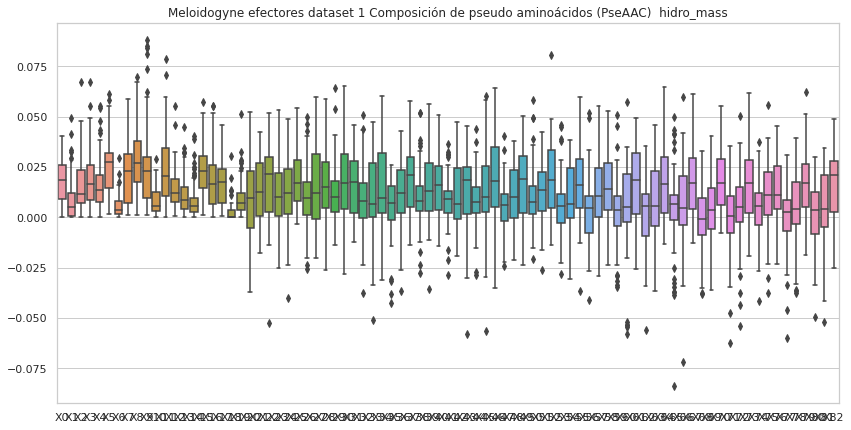

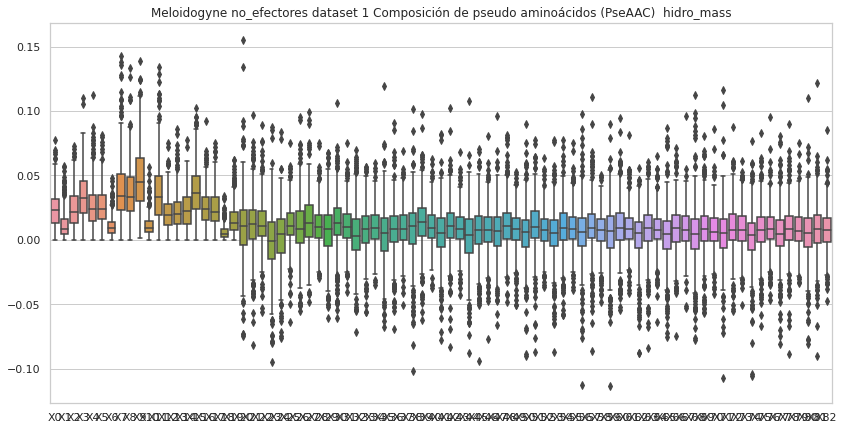

In [6]:
#hidro_mass
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "sin valores atípicos.\n"
comp = "hidro_mass"
df=""

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df_out = pd.DataFrame()


for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=PseAAC_hidro_mass_efec

    if etiq == "no_efectores":
        df=PseAAC_hidro_mass_no_efec

    del df['X83']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X83'] = etiq    
    df_out = pd.concat([df_out,df])
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)
    
    
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))

# Composición de pseudo aminoácidos (PseAAC) mass

efectores
Composición de pseudo aminoácidos (PseAAC)  mass efectores Meloidogyne dataset 1, con valores atípicos.
Valores del documento csv.

          X0        X1        X2        X3        X4        X5        X6  \
0   0.068085  0.008010  0.060075  0.104130  0.028035  0.032040  0.016020   
1   0.018035  0.027052  0.048093  0.081157  0.045087  0.069134  0.021041   
2   0.017770  0.024433  0.042203  0.013327  0.028876  0.053309  0.015548   
3   0.021619  0.013512  0.027024  0.018917  0.013512  0.032429  0.008107   
4   0.034475  0.034475  0.020685  0.034475  0.110320  0.027580  0.013790   
..       ...       ...       ...       ...       ...       ...       ...   
95  0.040175  0.020088  0.095416  0.030132  0.030132  0.015066  0.005022   
96  0.015383  0.011538  0.010256  0.011538  0.006410  0.023075  0.008974   
97  0.030023  0.007506  0.022517  0.007506  0.015012  0.035027  0.002502   
98  0.051194  0.000000  0.015998  0.009599  0.015998  0.047994  0.003200   
99  0.028961  0.011139

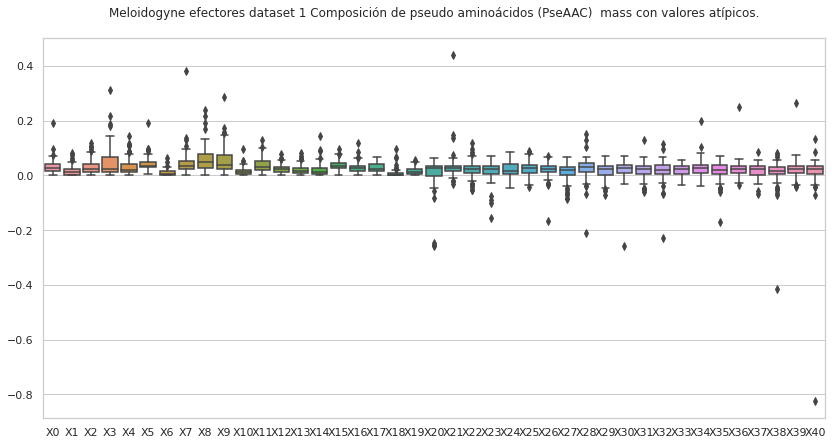

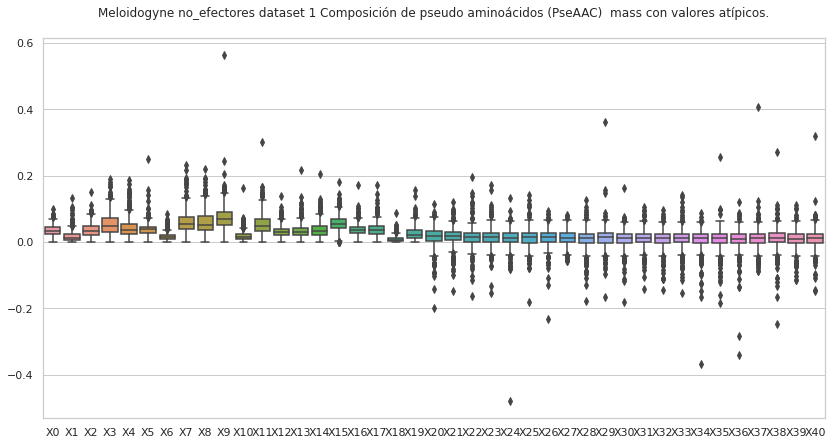

In [7]:
#mass
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "con valores atípicos.\n"
comp = "mass"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=PseAAC_mass_efec

    if etiq == "no_efectores":
        df=PseAAC_mass_no_efec

    #del df['X41']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Composición de pseudo aminoácidos (PseAAC) mass, sin valores atípicos

Composición de pseudo aminoácidos (PseAAC)  mass efectores Meloidogyne dataset 1, sin valores atípicos.
Valores del documento csv.

          X0        X1        X2        X3        X4        X5        X6  \
0   0.068085  0.008010  0.060075  0.104130  0.028035  0.032040  0.016020   
1   0.018035  0.027052  0.048093  0.081157  0.045087  0.069134  0.021041   
2   0.017770  0.024433  0.042203  0.013327  0.028876  0.053309  0.015548   
3   0.021619  0.013512  0.027024  0.018917  0.013512  0.032429  0.008107   
5   0.042880  0.000000  0.028586  0.021440  0.038115  0.019058  0.019058   
..       ...       ...       ...       ...       ...       ...       ...   
95  0.040175  0.020088  0.095416  0.030132  0.030132  0.015066  0.005022   
96  0.015383  0.011538  0.010256  0.011538  0.006410  0.023075  0.008974   
97  0.030023  0.007506  0.022517  0.007506  0.015012  0.035027  0.002502   
98  0.051194  0.000000  0.015998  0.009599  0.015998  0.047994  0.003200   
99  0.028961  0.011139  0.006683

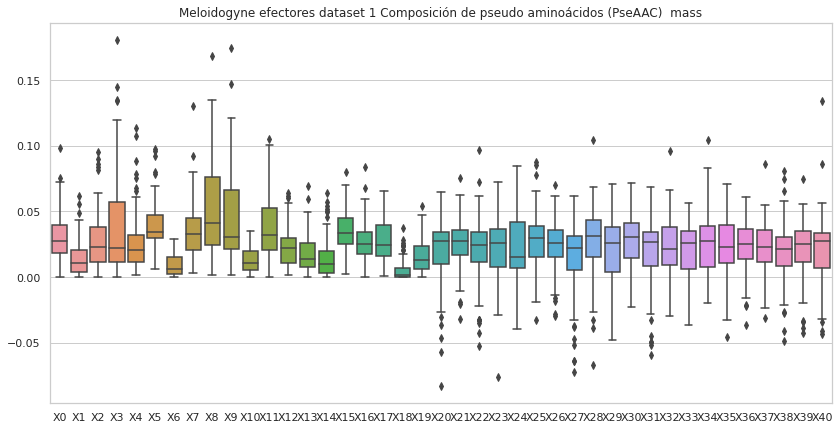

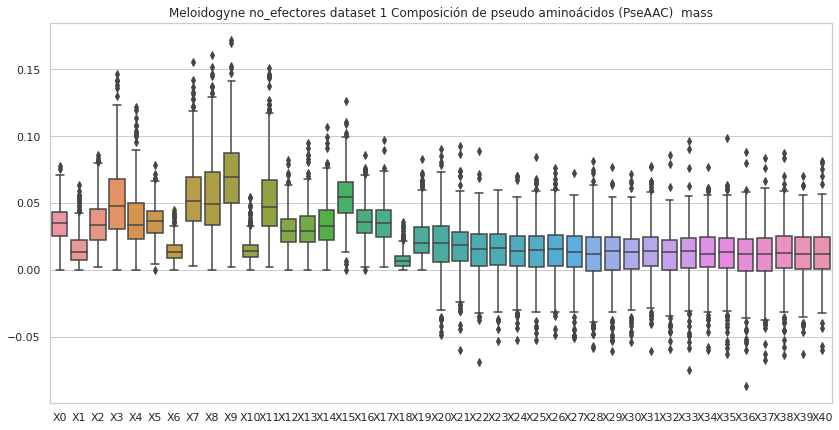

In [8]:
#mass
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "sin valores atípicos.\n"
comp = "mass"
df=""

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df_out = pd.DataFrame()

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))

    if etiq == "efectores":
        df=PseAAC_mass_efec

    if etiq == "no_efectores":
        df=PseAAC_mass_no_efec

    del df['X41']
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X41'] = etiq
    df_out = pd.concat([df_out,df])
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)
    
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))

# Composición de pseudo aminoácidos (PseAAC) hidro

efectores
Composición de pseudo aminoácidos (PseAAC)  hidro efectores Meloidogyne dataset 1, con valores atípicos.
Valores del documento csv.

          X0        X1        X2        X3        X4        X5        X6  \
0   0.018277  0.002150  0.016127  0.027954  0.007526  0.008601  0.004301   
1   0.008166  0.012248  0.021775  0.036745  0.020414  0.031301  0.009527   
2   0.041872  0.057574  0.099445  0.031404  0.068042  0.125615  0.036638   
3   0.045142  0.028214  0.056428  0.039499  0.028214  0.067713  0.016928   
4   0.011651  0.011651  0.006991  0.011651  0.037284  0.009321  0.004661   
..       ...       ...       ...       ...       ...       ...       ...   
95  0.029139  0.014569  0.069205  0.021854  0.021854  0.010927  0.003642   
96  0.041387  0.031040  0.027591  0.031040  0.017244  0.062080  0.024142   
97  0.057701  0.014425  0.043276  0.014425  0.028850  0.067318  0.004808   
98  0.064255  0.000000  0.020080  0.012048  0.020080  0.060239  0.004016   
99  0.063137  0.02428

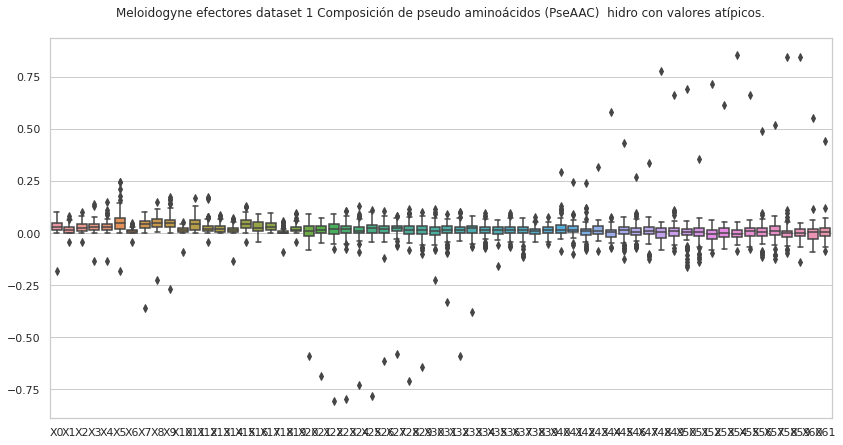

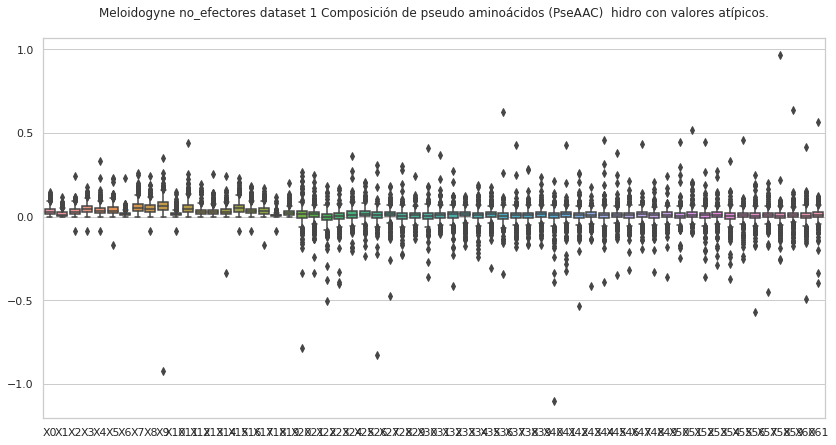

In [9]:
#hidro
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "con valores atípicos.\n"
comp = "hidro"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=PseAAC_hidro_efec

    if etiq == "no_efectores":
        df=PseAAC_hidro_no_efec

    #del df['X62']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Composición de pseudo aminoácidos (PseAAC) hidro, sin valores atípicos

efectores
Composición de pseudo aminoácidos (PseAAC)  efectores Meloidogyne dataset 1, sin valores atípicos.
Valores del documento csv.

          X0        X1        X2        X3        X4        X5        X6  \
0   0.018277  0.002150  0.016127  0.027954  0.007526  0.008601  0.004301   
1   0.008166  0.012248  0.021775  0.036745  0.020414  0.031301  0.009527   
3   0.045142  0.028214  0.056428  0.039499  0.028214  0.067713  0.016928   
4   0.011651  0.011651  0.006991  0.011651  0.037284  0.009321  0.004661   
5   0.040904  0.000000  0.027269  0.020452  0.036359  0.018179  0.018179   
..       ...       ...       ...       ...       ...       ...       ...   
93  0.015147  0.005049  0.015147  0.010098  0.030294  0.055539  0.030294   
95  0.029139  0.014569  0.069205  0.021854  0.021854  0.010927  0.003642   
97  0.057701  0.014425  0.043276  0.014425  0.028850  0.067318  0.004808   
98  0.064255  0.000000  0.020080  0.012048  0.020080  0.060239  0.004016   
99  0.063137  0.024283  0.0

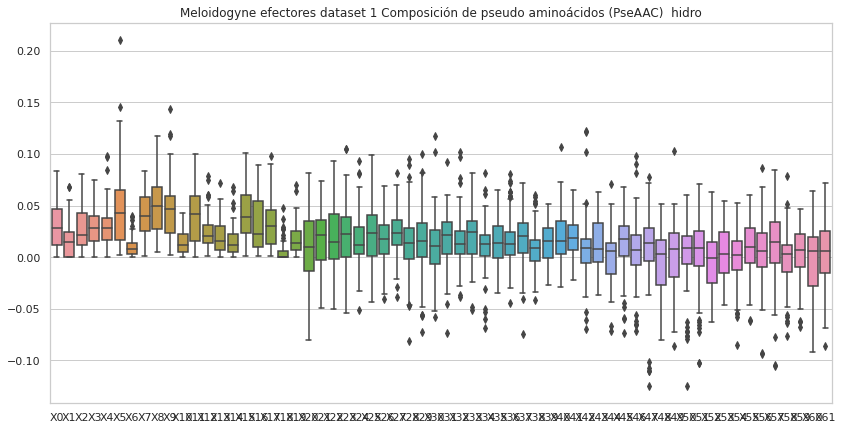

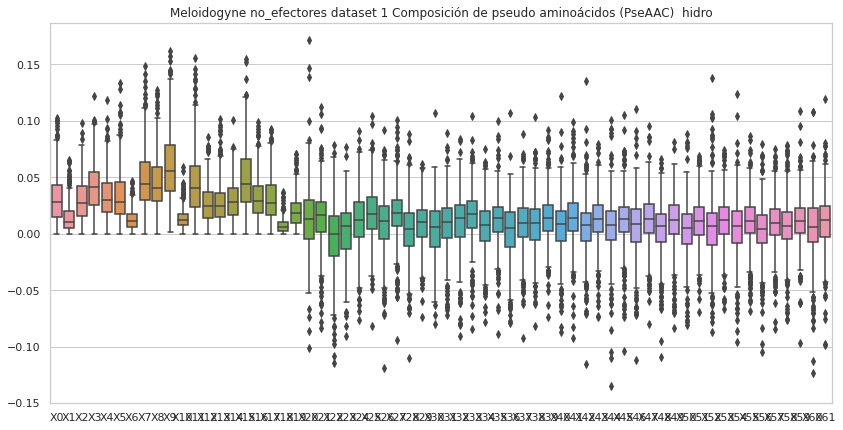

In [10]:
#hidro
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "sin valores atípicos.\n"
comp = "hidro"
df=""

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df_out = pd.DataFrame()


for etiq in "efectores", "no_efectores":
    titulo = (str(transf) +" "+ str(etiq) + " " + str(nombre2) + ", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=PseAAC_hidro_efec

    if etiq == "no_efectores":
        df=PseAAC_hidro_no_efec

    del df['X62']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X62'] = etiq    
    df_out = pd.concat([df_out,df]) 
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)
    
    
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))

# Covarianza de auto cruzamiento (ACC) hidro_mass

efectores
Covarianza de auto cruzamiento (ACC)  hidro_mass efectores Meloidogyne dataset 1, con valores atípicos.
Valores del documento csv.

          X0        X1        X2        X3        X4        X5        X6  \
0  -0.016711 -0.038819  0.034747  0.004099  0.000577 -0.042956 -0.075184   
1  -0.024730 -0.033735  0.043962  0.059285 -0.029851  0.003876  0.021239   
2   0.099254  0.018412  0.113440  0.048564 -0.052121 -0.055317 -0.031070   
3   0.007302 -0.010581  0.011657 -0.036138 -0.054003  0.018823 -0.040838   
4  -0.043124  0.000099 -0.102402  0.083976 -0.010418 -0.070118 -0.069451   
..       ...       ...       ...       ...       ...       ...       ...   
95  0.012909 -0.018473 -0.079513 -0.022248 -0.016018  0.034589 -0.007860   
96  0.034983  0.024450  0.045605  0.002157 -0.034961  0.089501 -0.000895   
97  0.074108  0.033914 -0.040629 -0.027014  0.007079 -0.038036 -0.007393   
98  0.217638 -0.022910  0.168145  0.035309  0.095543  0.076718  0.141923   
99  0.019018 -0.046037

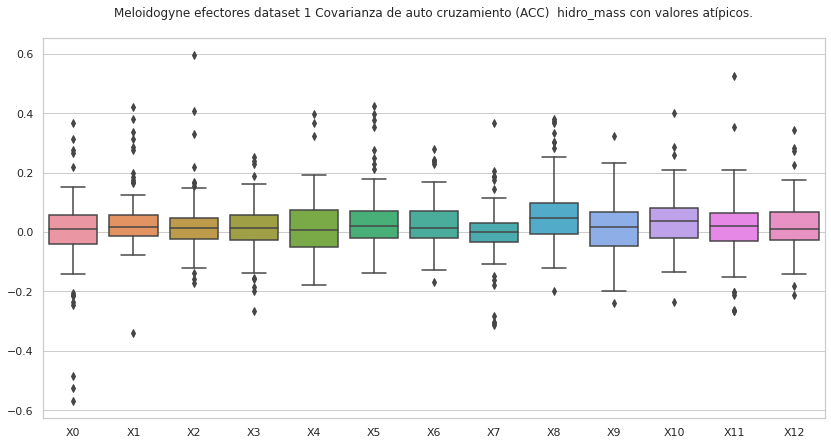

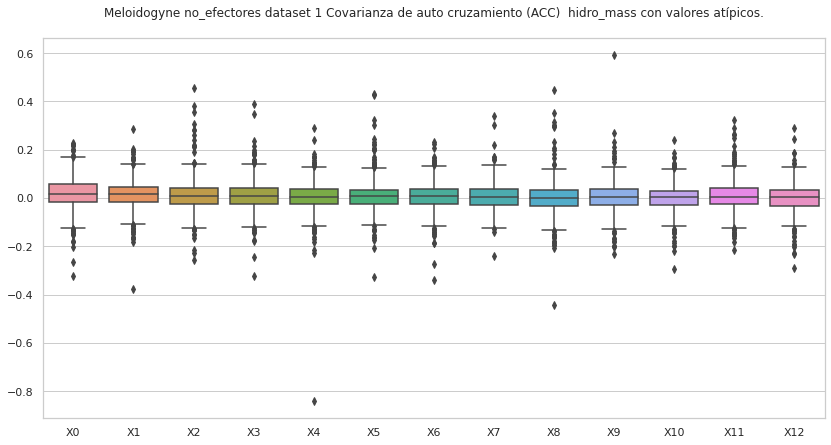

In [11]:
#hidro_mass
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "con valores atípicos.\n"
comp = "hidro_mass"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=ACC_hidro_mass_efec

    if etiq == "no_efectores":
        df=ACC_hidro_mass_no_efec

    #del df['X13']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Covarianza de auto cruzamiento (ACC) hidro_mass, sin valores atípicos

efectores
Covarianza de auto cruzamiento (ACC)  hidro_mass efectores Meloidogyne dataset 1, sin valores atípicos.
Valores del documento csv.

          X0        X1        X2        X3        X4        X5        X6  \
0  -0.016711 -0.038819  0.034747  0.004099  0.000577 -0.042956 -0.075184   
1  -0.024730 -0.033735  0.043962  0.059285 -0.029851  0.003876  0.021239   
2   0.099254  0.018412  0.113440  0.048564 -0.052121 -0.055317 -0.031070   
3   0.007302 -0.010581  0.011657 -0.036138 -0.054003  0.018823 -0.040838   
4  -0.043124  0.000099 -0.102402  0.083976 -0.010418 -0.070118 -0.069451   
..       ...       ...       ...       ...       ...       ...       ...   
95  0.012909 -0.018473 -0.079513 -0.022248 -0.016018  0.034589 -0.007860   
96  0.034983  0.024450  0.045605  0.002157 -0.034961  0.089501 -0.000895   
97  0.074108  0.033914 -0.040629 -0.027014  0.007079 -0.038036 -0.007393   
98  0.217638 -0.022910  0.168145  0.035309  0.095543  0.076718  0.141923   
99  0.019018 -0.046037

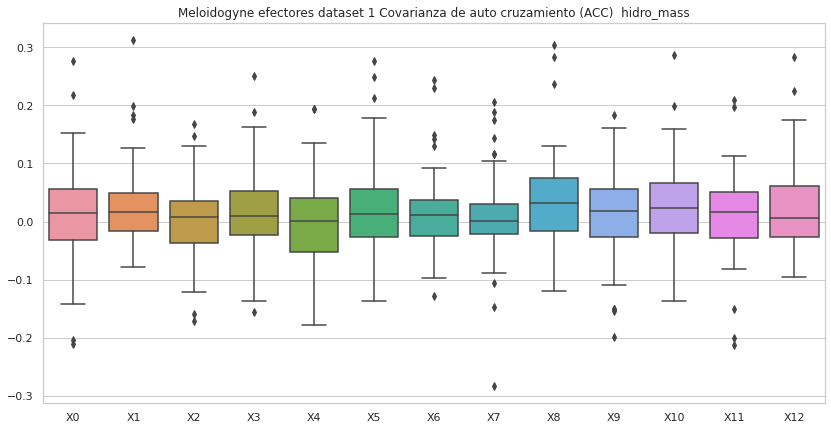

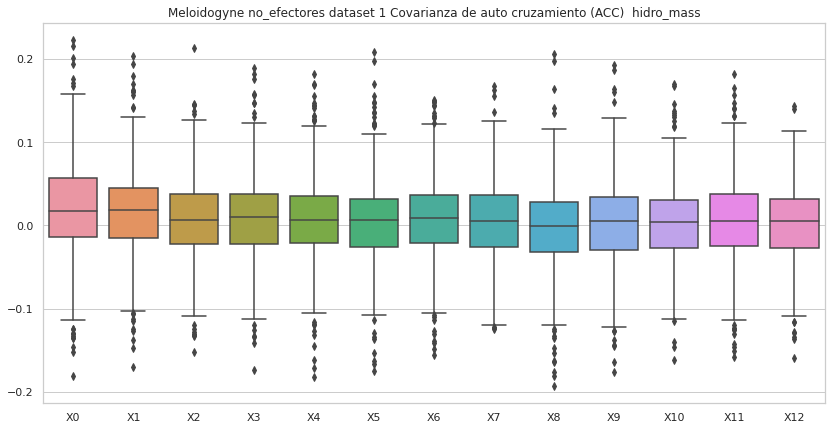

In [12]:
#hidro_mass
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "sin valores atípicos.\n"
comp = "hidro_mass"
df=""

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df_out = pd.DataFrame()

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=ACC_hidro_mass_efec

    if etiq == "no_efectores":
        df=ACC_hidro_mass_no_efec

    del df['X13']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X13'] = etiq    
    df_out = pd.concat([df_out,df]) 
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)

    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))

# Covarianza de auto cruzamiento (ACC) mass

efectores
Covarianza de auto cruzamiento (ACC)  mass efectores Meloidogyne dataset 1, con valores atípicos.
Valores del documento csv.

          X0        X1        X2        X3        X4        X5        X6  \
0  -0.016711 -0.038819  0.034747  0.004099  0.000577 -0.042956 -0.075184   
1  -0.024730 -0.033735  0.043962  0.059285 -0.029851  0.003876  0.021239   
2   0.099254  0.018412  0.113440  0.048564 -0.052121 -0.055317 -0.031070   
3   0.007302 -0.010581  0.011657 -0.036138 -0.054003  0.018823 -0.040838   
4  -0.043124  0.000099 -0.102402  0.083976 -0.010418 -0.070118 -0.069451   
..       ...       ...       ...       ...       ...       ...       ...   
95  0.012909 -0.018473 -0.079513 -0.022248 -0.016018  0.034589 -0.007860   
96  0.034983  0.024450  0.045605  0.002157 -0.034961  0.089501 -0.000895   
97  0.074108  0.033914 -0.040629 -0.027014  0.007079 -0.038036 -0.007393   
98  0.217638 -0.022910  0.168145  0.035309  0.095543  0.076718  0.141923   
99  0.019018 -0.046037 -0.07

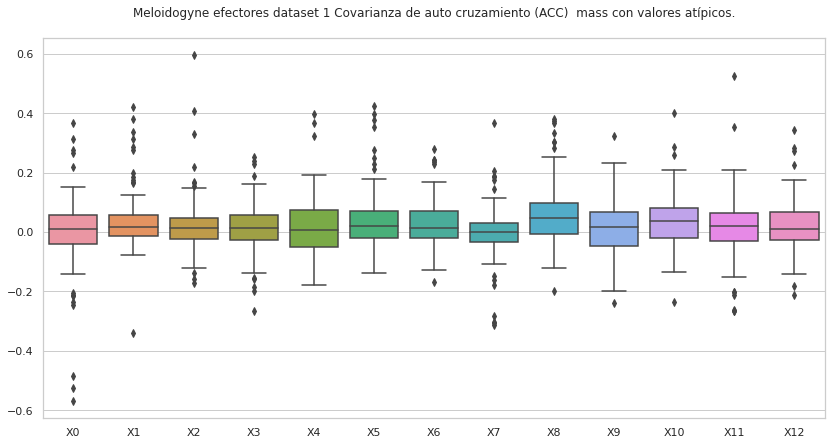

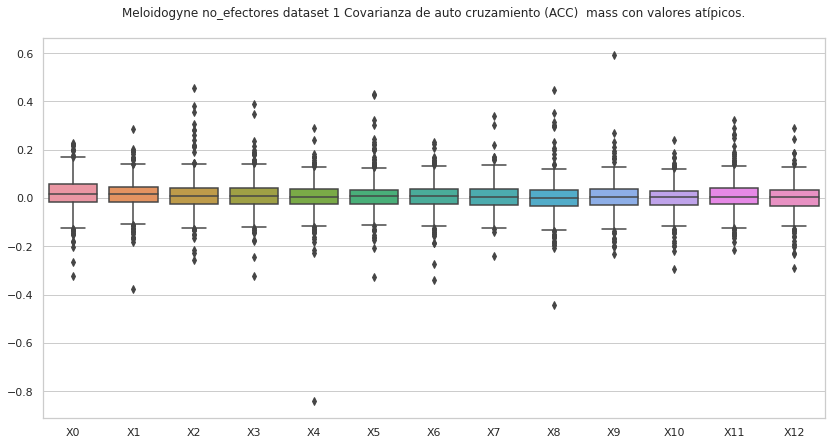

In [13]:
#mass
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "con valores atípicos.\n"
comp = "mass"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=ACC_mass_efec

    if etiq == "no_efectores":
        df=ACC_mass_no_efec

    #del df['X13']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Covarianza de auto cruzamiento (ACC) mass, sin valores atípicos

Covarianza de auto cruzamiento (ACC)  mass efectores Meloidogyne dataset 1, sin valores atípicos.
Valores del documento csv.

          X0        X1        X2        X3        X4        X5        X6  \
0  -0.016711 -0.038819  0.034747  0.004099  0.000577 -0.042956 -0.075184   
1  -0.024730 -0.033735  0.043962  0.059285 -0.029851  0.003876  0.021239   
2   0.099254  0.018412  0.113440  0.048564 -0.052121 -0.055317 -0.031070   
3   0.007302 -0.010581  0.011657 -0.036138 -0.054003  0.018823 -0.040838   
4  -0.043124  0.000099 -0.102402  0.083976 -0.010418 -0.070118 -0.069451   
..       ...       ...       ...       ...       ...       ...       ...   
95  0.012909 -0.018473 -0.079513 -0.022248 -0.016018  0.034589 -0.007860   
96  0.034983  0.024450  0.045605  0.002157 -0.034961  0.089501 -0.000895   
97  0.074108  0.033914 -0.040629 -0.027014  0.007079 -0.038036 -0.007393   
98  0.217638 -0.022910  0.168145  0.035309  0.095543  0.076718  0.141923   
99  0.019018 -0.046037 -0.076364  0.03

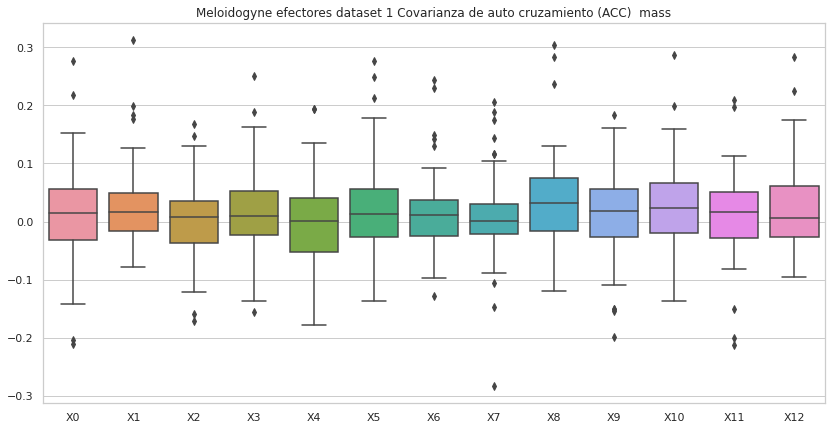

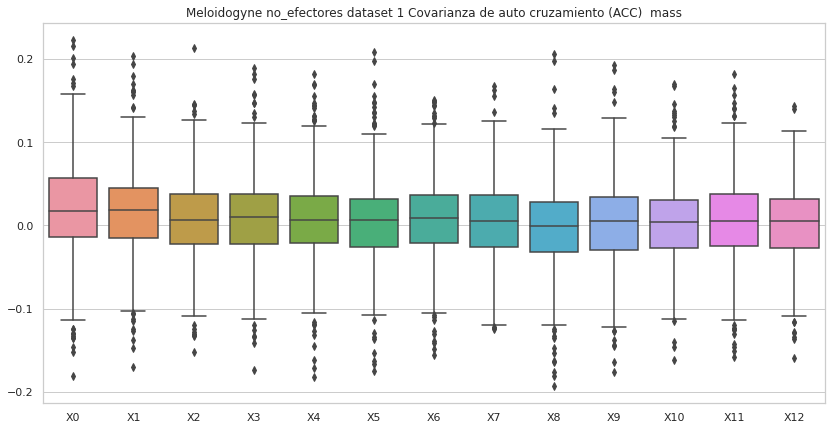

In [14]:
#mass
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "sin valores atípicos.\n"
comp = "mass"
df=""

#Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df=""
df_out = pd.DataFrame()

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))

    if etiq == "efectores":
        df=ACC_mass_efec

    if etiq == "no_efectores":
        df=ACC_mass_no_efec

    del df['X13']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X13'] = etiq    
    df_out = pd.concat([df_out,df]) 
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)    

    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))

# Covarianza de auto cruzamiento (ACC) hidro

efectores
Covarianza de auto cruzamiento (ACC)  hidro efectores Meloidogyne dataset 1, con valores atípicos.
Valores del documento csv.

          X0        X1        X2        X3        X4        X5        X6  \
0   0.081814  0.074866  0.230401  0.168680 -0.020038  0.085978  0.067126   
1  -0.032596  0.193662  0.162619  0.019286  0.173091  0.175636  0.086643   
2   0.056670  0.009894 -0.075014 -0.047856 -0.043665 -0.115383  0.065359   
3  -0.058783  0.071121 -0.121116  0.017349 -0.183891 -0.003685 -0.060185   
4   0.044512  0.054776  0.080541  0.081847  0.123093 -0.070253 -0.003033   
..       ...       ...       ...       ...       ...       ...       ...   
95  0.050216  0.005412  0.151306  0.141364 -0.027907  0.088667  0.137127   
96 -0.047844 -0.044908  0.024577 -0.016167 -0.002997  0.001896  0.013139   
97  0.132159  0.068076  0.039767  0.019330  0.092448  0.120548  0.062074   
98  0.245521 -0.036898  0.080500  0.127070  0.141525  0.041621 -0.059005   
99  0.006297  0.103350 -0.0

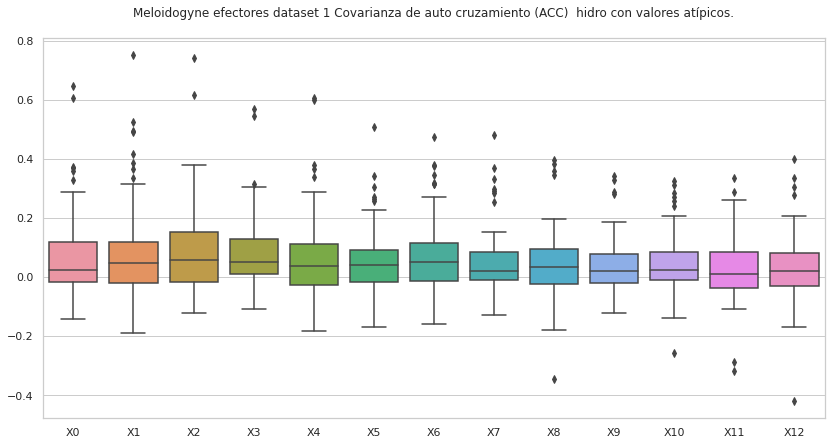

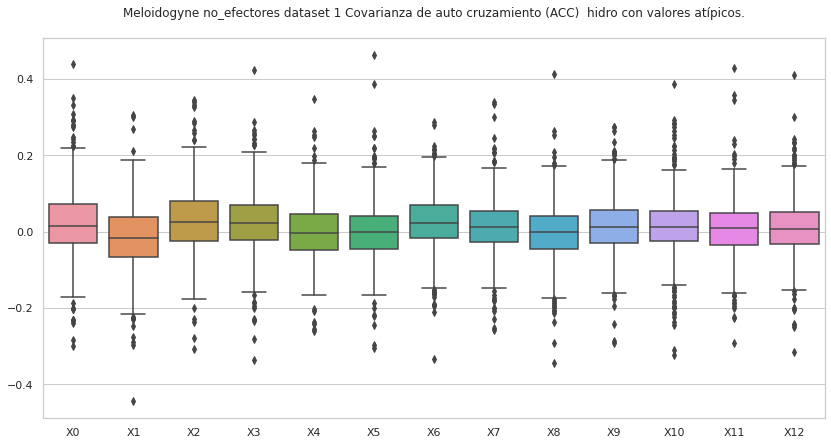

In [15]:
#hidro
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "con valores atípicos.\n"
comp = "hidro"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=ACC_hidro_efec

    if etiq == "no_efectores":
        df=ACC_hidro_no_efec

    #del df['X13']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Covarianza de auto cruzamiento (ACC) hidro, sin valores atípicos

efectores
Covarianza de auto cruzamiento (ACC)  efectores Meloidogyne dataset 1, sin valores atípicos.
Valores del documento csv.

          X0        X1        X2        X3        X4        X5        X6  \
0   0.081814  0.074866  0.230401  0.168680 -0.020038  0.085978  0.067126   
1  -0.032596  0.193662  0.162619  0.019286  0.173091  0.175636  0.086643   
2   0.056670  0.009894 -0.075014 -0.047856 -0.043665 -0.115383  0.065359   
3  -0.058783  0.071121 -0.121116  0.017349 -0.183891 -0.003685 -0.060185   
4   0.044512  0.054776  0.080541  0.081847  0.123093 -0.070253 -0.003033   
..       ...       ...       ...       ...       ...       ...       ...   
95  0.050216  0.005412  0.151306  0.141364 -0.027907  0.088667  0.137127   
96 -0.047844 -0.044908  0.024577 -0.016167 -0.002997  0.001896  0.013139   
97  0.132159  0.068076  0.039767  0.019330  0.092448  0.120548  0.062074   
98  0.245521 -0.036898  0.080500  0.127070  0.141525  0.041621 -0.059005   
99  0.006297  0.103350 -0.020410 

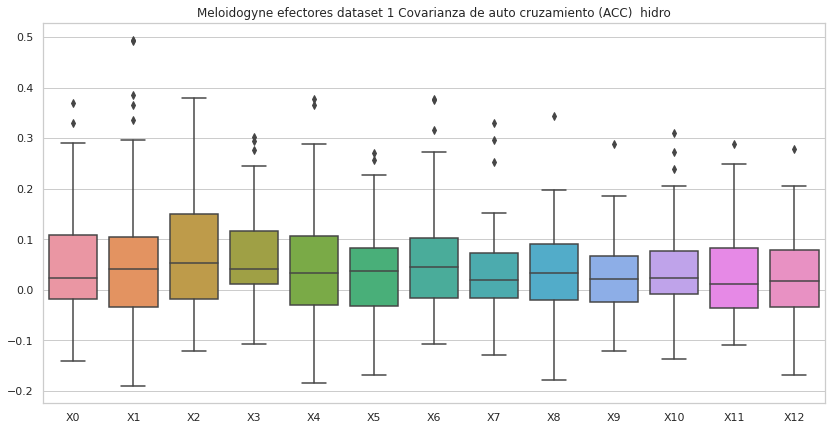

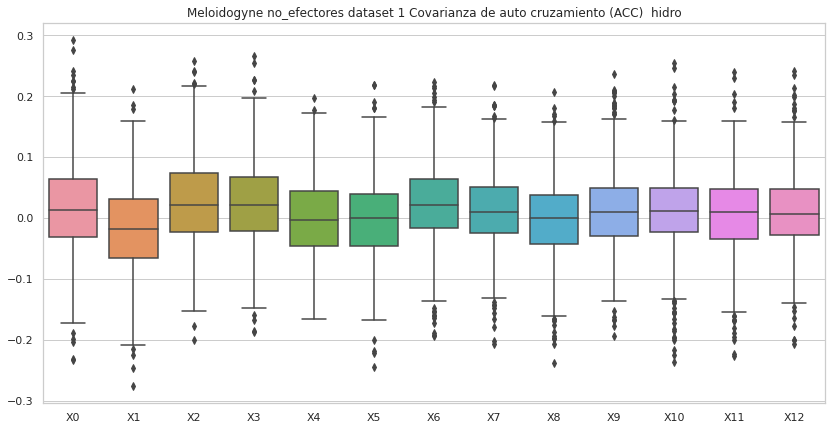

In [16]:
#hidro
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "sin valores atípicos.\n"
comp = "hidro"
df=""

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df_out = pd.DataFrame()

for etiq in "efectores", "no_efectores":
    titulo = (str(transf) +" "+ str(etiq) + " " + str(nombre2) + ", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=ACC_hidro_efec

    if etiq == "no_efectores":
        df=ACC_hidro_no_efec

    del df['X13']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X13'] = etiq    
    df_out = pd.concat([df_out,df]) 
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)    
    
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))